In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import time, datetime
import warnings #if at all we get warnings(NOT errors)
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("My Uber Drives - 2016.csv")

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.columns = df.columns.str.replace("*","") #replacing the spl characters in column names

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
df.shape

(1156, 7)

In [ ]:
df.describe() #we get details of miles only because, describe works only on numeric values to include all the columns write, include = 'all'

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


HANDLING MISSING VALUES

In [ ]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

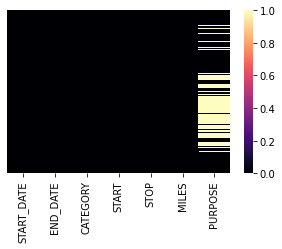

In [ ]:
plt.figure(figsize=(5,3)) # increase to 15,10 for a clear view
sb.heatmap(df.isnull(), cmap='magma', yticklabels=False)
plt.show()

In [ ]:
!pip install missingno

AxesSubplot(0.125,0.125;0.775x0.755)


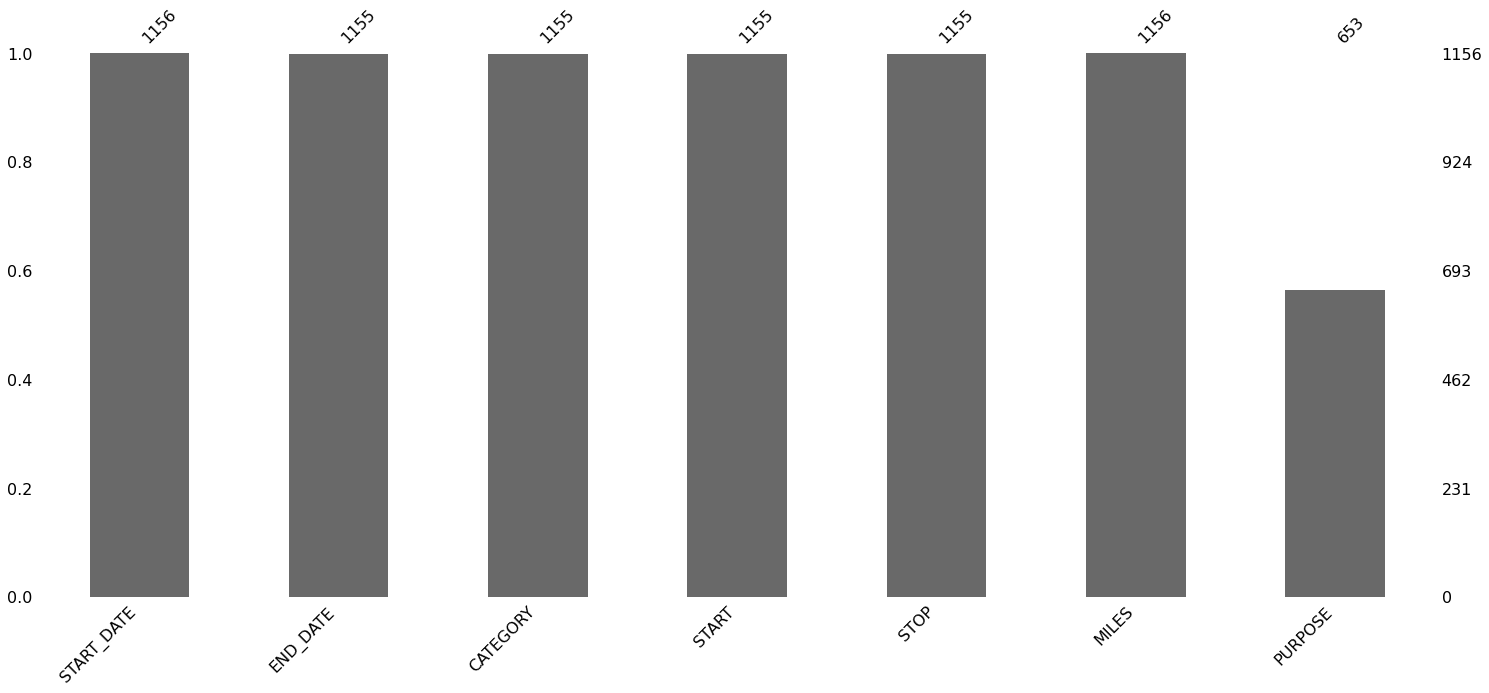

In [ ]:
import missingno as mn
x = mn.bar(df)
print(x)

In [ ]:
null_columns = df.columns[df.isnull().any()] #selects columns that has even one null value in them
df[null_columns].isnull().sum() #prints the sum of null values in respective columns

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [ ]:
#remember index is the left side rowname given in the pandas dataframe
df.drop(index=1155, axis=0, inplace=True)

In [ ]:
df.tail() #1155th index is gone now since we deleted it in the previous cell code 

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [ ]:
df['PURPOSE'].isnull().sum() #NO OF NULL VALUES IN PURPOSE COLUMN
len(df['PURPOSE']) #no of values in purpose column
len(df['PURPOSE']) - df['PURPOSE'].isnull().sum() #no of non null values in purpose colums

653

In [ ]:
df['PURPOSE'].isnull().sum()/len(df)

0.43463203463203465

In [ ]:
df['PURPOSE'].fillna(method='ffill', inplace=True) #ffill will take values from previous row of the same column; inplace=True means it will completely replace the values in the memory

In [ ]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce') #changes the date format in the column
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


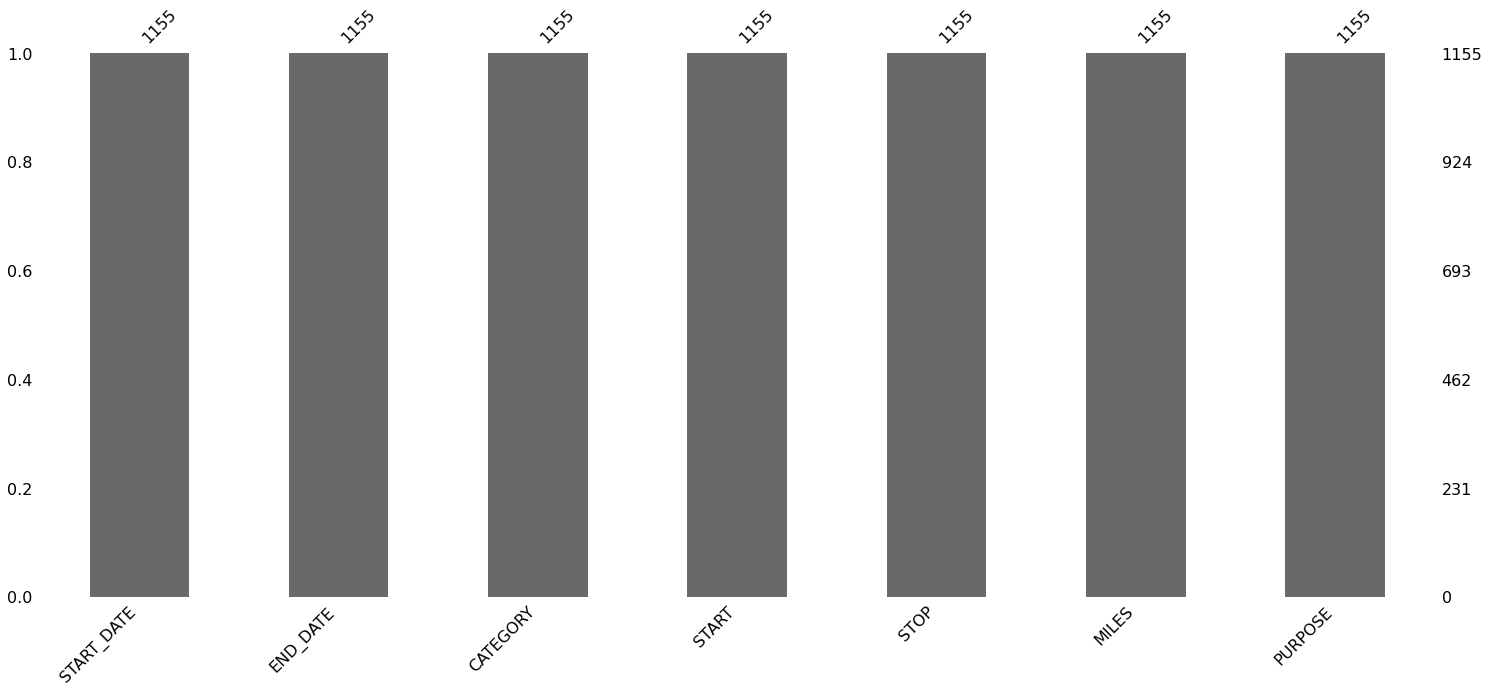

In [ ]:
import missingno as ms
ms.bar(df)
plt.show()

In [ ]:
category = pd.crosstab(index=df['CATEGORY'], columns = 'count of travel as per category') #CROSSTAB IS A REALLY USEFUL FUNCTION. It will collect the categories in a column and shares the result with the numbers of each category
category

col_0,count of travel as per category
CATEGORY,
Business,1078
Personal,77


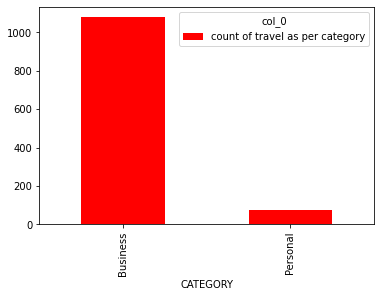

In [ ]:
category.plot(kind='bar',color='r')

In [ ]:
start_point = df.START.value_counts() #counting the values of START points like how many times islamabad has occured something like that
start_point

Cary                          201
Unknown Location              148
Morrisville                    85
Whitebridge                    68
Islamabad                      57
                             ... 
Meredith                        1
Convention Center District      1
Fuquay-Varina                   1
Washington Avenue               1
Briar Meadow                    1
Name: START, Length: 177, dtype: int64

In [ ]:
print(start_point[start_point>10]) #start_point with numbers greater than 10

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Westpark Place       17
Berkeley             16
Midtown              14
R?walpindi           11
Kissimmee            11
Kenner               11
Name: START, dtype: int64


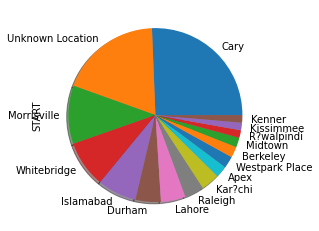

In [ ]:
start_point[start_point>10].plot(kind="pie", shadow=True)

In [ ]:
stop_point = df.STOP.value_counts() #you can write it like below code also
stop_point

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Wake Co.               1
Washington Avenue      1
Chapel Hill            1
South Berkeley         1
Briar Meadow           1
Name: STOP, Length: 188, dtype: int64

In [ ]:
#alias to previous code
stop_p = df['STOP'].value_counts()
stop_p

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Wake Co.               1
Washington Avenue      1
Chapel Hill            1
South Berkeley         1
Briar Meadow           1
Name: STOP, Length: 188, dtype: int64

In [ ]:
stop_point[stop_point>10].value_counts()

16     2
36     2
29     1
17     1
26     1
11     1
149    1
84     1
58     1
13     1
12     1
203    1
65     1
Name: STOP, dtype: int64

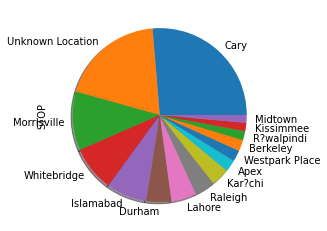

In [ ]:
stop_point[stop_point>10].plot(kind='pie',shadow=True)

In [ ]:
miles = df['MILES'].value_counts()
miles

9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 256, dtype: int64

In [ ]:
print(miles[miles>10])

9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES, dtype: int64


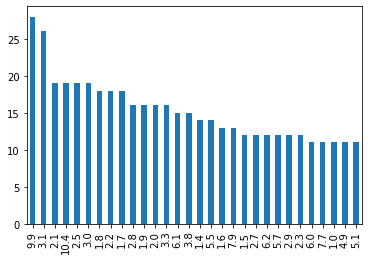

In [ ]:
miles[miles>10].plot(kind='bar')

In [ ]:
miles[miles<=10]

8.7      10
3.9      10
3.6      10
8.4      10
5.3      10
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 226, dtype: int64

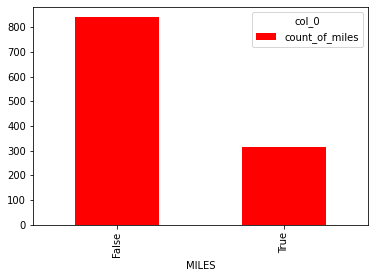

In [ ]:
miles = pd.crosstab(index=df['MILES']>10, columns='count_of_miles')
miles.plot(kind='bar', color='r')

In [ ]:
print(miles[miles<=10])

col_0  count_of_miles
MILES                
False             NaN
True              NaN


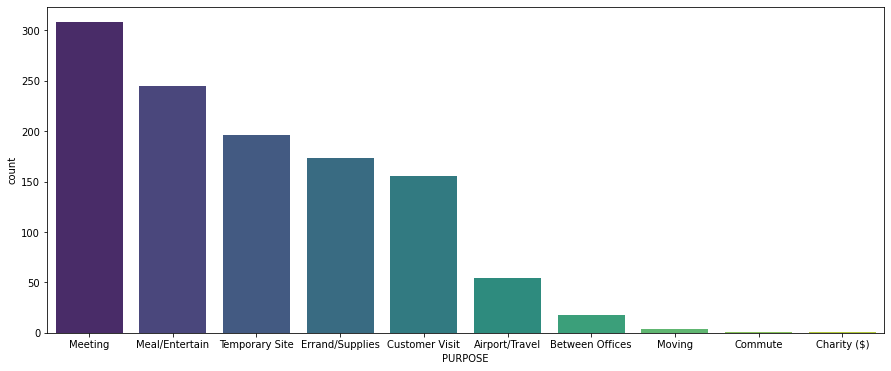

In [ ]:
df['PURPOSE'].value_counts()
plt.figure(figsize=(15,6))
sb.countplot(df['PURPOSE'], order=df['PURPOSE'].value_counts().index, palette='viridis') #order: orders it in descending order
plt.show()

Lets calculate the duration, as there might be some relationship with the ride.

In [ ]:
df['minutes'] = df.END_DATE - df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [ ]:
df['minutes'] = df['minutes'].dt.total_seconds()/60


In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [ ]:
df['minutes']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: minutes, Length: 1155, dtype: float64

In [ ]:
#Let's do some visualization,
#We will group miles by purpose to see if we get any pattern

In [ ]:
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean(),
              'Max': df.groupby(['PURPOSE'])['MILES'].max(),
              'Min':df.groupby(['PURPOSE'])['MILES'].min()})

,Mean,Max,Min
PURPOSE,,,
Airport/Travel,14.953704,156.9,0.9
Between Offices,10.944444,39.2,1.9
Charity ($),15.100000,15.1,15.1
Commute,180.200000,180.2,180.2
Customer Visit,16.065806,310.3,0.6
Errand/Supplies,5.928902,195.3,0.5
Meal/Entertain,5.773878,36.5,0.6
Meeting,12.652597,201.0,0.7
Moving,4.550000,6.1,3.3


In [ ]:
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean().round(1), #adding roundoff
              'Max': df.groupby(['PURPOSE'])['MILES'].max(),
              'Min':df.groupby(['PURPOSE'])['MILES'].min()}).reset_index() #index is set to the serial numbers

,PURPOSE,Mean,Max,Min
0,Airport/Travel,15.0,156.9,0.9
1,Between Offices,10.9,39.2,1.9
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,310.3,0.6
5,Errand/Supplies,5.9,195.3,0.5
6,Meal/Entertain,5.8,36.5,0.6
7,Meeting,12.7,201.0,0.7
8,Moving,4.6,6.1,3.3
9,Temporary Site,11.0,195.6,0.7


In [ ]:
#box plot of miles and minutes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

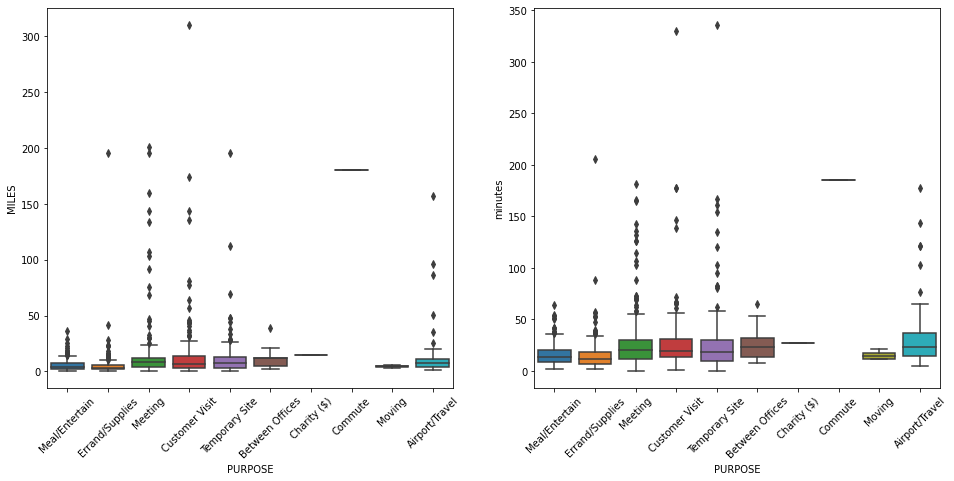

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1) #subplot is like to create two or more plots in one cell. 1,2,1 means first row second columns and first place that is this graph will be in 0,1. Next graph will be at 0,2 i.e plt.subplot(1,2,2)
sb.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sb.boxplot(data=df, x=df.PURPOSE, y=df.minutes)
plt.xticks(rotation=45)
#you can see in first graph that like meal and errand they have minimum outliers. In 2nd graph also you'll have the same. the outliers are between 0 to 50 in first and 0 to 70 in 2nd graph for both meal and errand.

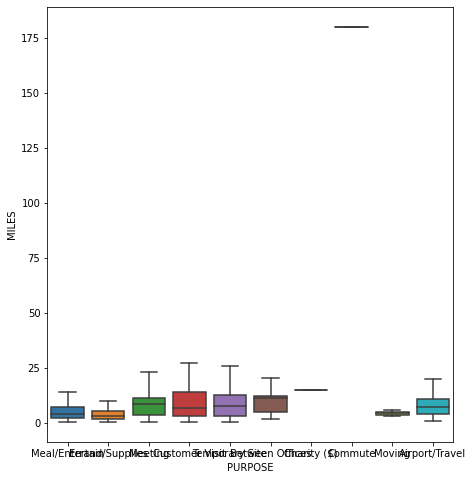

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sb.boxplot(data=df, x=df.PURPOSE, y=df.MILES, showfliers=False) #showfliers will not show outliers

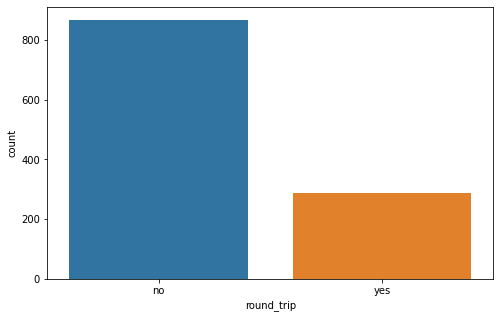

In [ ]:
#checking how many round trips are there, i.e start and stop should be same for that
plt.figure(figsize=(8,5))
def round(x):
  if x["START"] == x["STOP"]:
    return "yes"
  else:
    return "no" 
df['round_trip'] = df.apply(round, axis=1)
sb.countplot(df['round_trip'], order = df['round_trip'].value_counts().index)
plt.show()

In [ ]:
#frequency of trips in each month
df['month'] = pd.DatetimeIndex(df['START_DATE']).month #using date time index we are extracting months from the dates and storing it in a new column months.

In [ ]:
dic = {1:"jan", 2:"feb", 3:"mar" , 4:"apr" , 5:"may" , 6:"jun" , 7:"jul" , 8:"aug" , 9:"sep" , 10:"oct" , 11:"nov" , 12:"dec"}

In [ ]:
df['month'] = df['month'].map(dic)

In [ ]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,round_trip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,dec


No handles with labels found to put in legend.


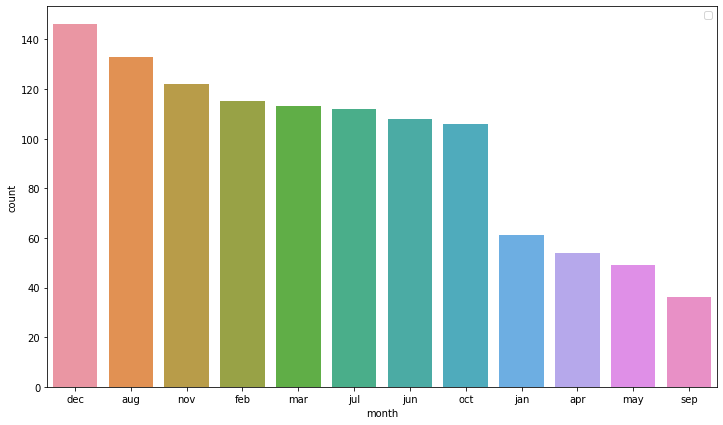

In [ ]:
plt.figure(figsize=(12,7))
sb.countplot(df['month'], order=df['month'].value_counts().index, palette='deep') #we write order for descending order
plt.legend()
#from the below graph we can say that december is the peak month for uber

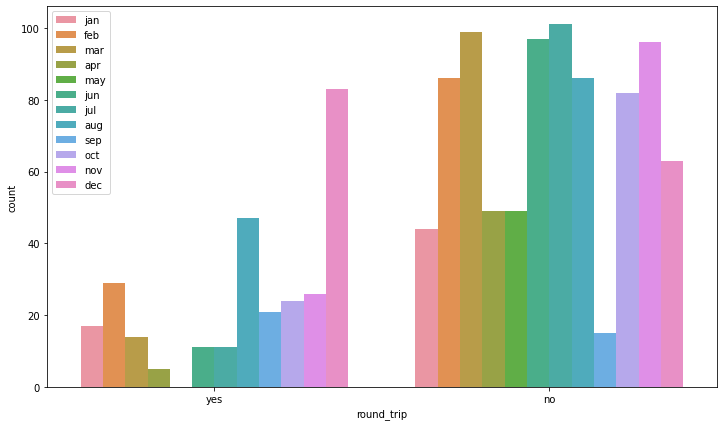

In [ ]:
plt.figure(figsize=(12,7))
sb.countplot(data=df, x=df['round_trip'], hue=df['month'])
plt.legend()

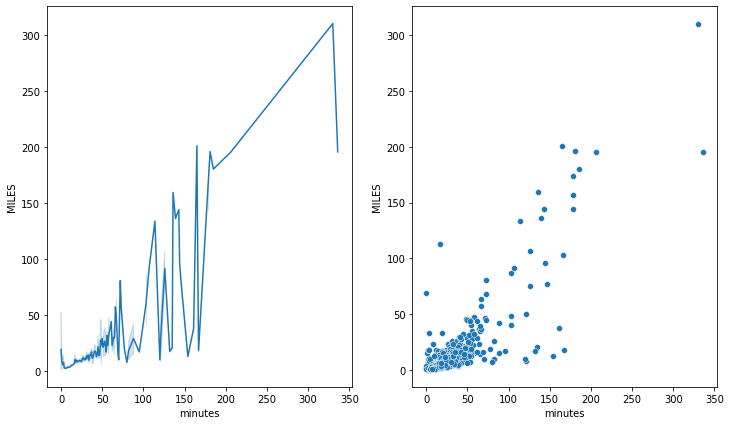

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sb.lineplot(data=df, x=df.minutes, y=df.MILES)
plt.subplot(1,2,2)
sb.scatterplot(data=df, x=df.minutes, y=df.MILES)
#boxplot, lineplot and scatterplot have same syntax
#in this graph we can say tgat wgen miles increases minutes also increases

In [ ]:
#distribution of cab rides based on category

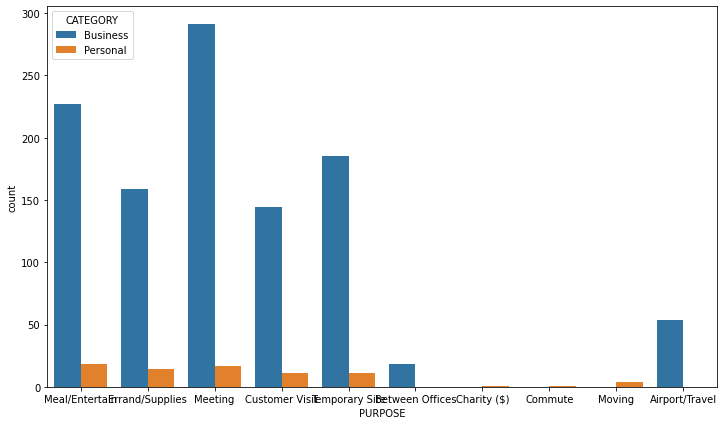

In [ ]:
plt.figure(figsize=(12,7))
sb.countplot(data=df, x=df['PURPOSE'], hue= 'CATEGORY' ) #you can write hue = df['CATEGORY'] also.
plt.show()

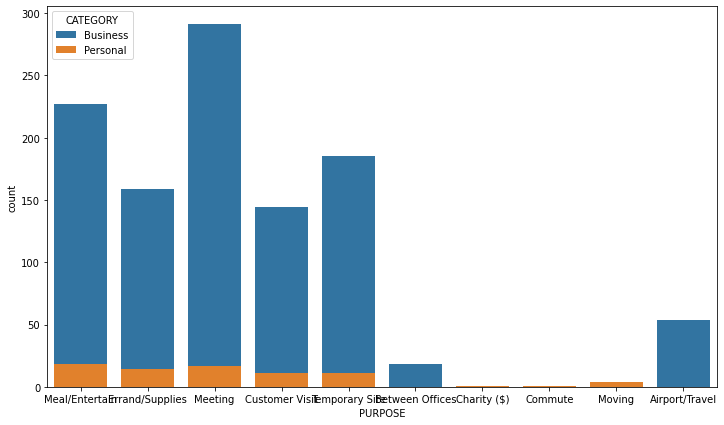

In [ ]:
plt.figure(figsize=(12,7))
sb.countplot(data=df, x=df['PURPOSE'], hue= 'CATEGORY', dodge=False ) #you can write hue = df['CATEGORY'] also.
plt.show()

In [ ]:
#Where do customers most frequently take cabs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

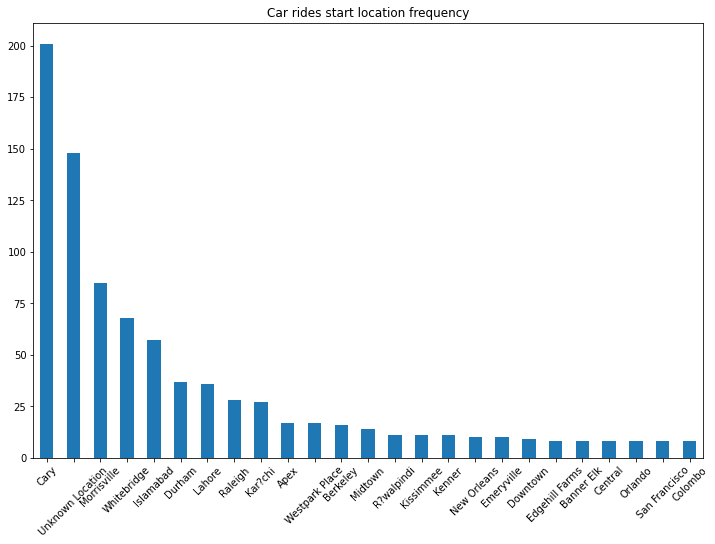

In [ ]:
plt.figure(figsize=(12,8))
pd.Series(df['START']).value_counts()[:25].plot(kind='bar')
plt.title('Car rides start location frequency')
plt.xticks(rotation=45)

In [ ]:
#plt.figure(figsize=(12,8))
#plt.plot(kind='bar', x= df['START'])

In [ ]:
We can make many conclusions like this and the analysis may fo on.